In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

In [3]:
print("DATASET DESCRIPTION")
print("=" * 60)
print()
print("For this analysis, I am using two complementary datasets that showcase")
print("spatial and temporal relationships:")
print()
print("1. CALIFORNIA HOUSING DATASET (housing.csv)")
print("   Source: This dataset comes from the California housing census data")
print("   from the 1990 U.S. Census, commonly used in machine learning education.")
print("   Features:")
print("   - longitude, latitude: Geographic coordinates (spatial)")
print("   - housing_median_age: Age of housing stock (temporal proxy)")
print("   - total_rooms, total_bedrooms: Housing characteristics")
print("   - population, households: Demographic information")
print("   - median_income: Economic indicator")
print("   - median_house_value: Target variable")
print("   - ocean_proximity: Categorical location feature")
print()
print("2. SPOTIFY 2023 TRACKS DATASET (spotify2023.csv)")
print("   Source: Kaggle dataset of most streamed songs on Spotify in 2023")
print("   Features:")
print("   - released_year, released_month, released_day: Temporal data")
print("   - streams: Popularity metric")
print("   - Audio features: danceability, energy, valence, etc.")
print("   - Platform presence: Spotify, Apple, Deezer charts")
print()

DATASET DESCRIPTION

For this analysis, I am using two complementary datasets that showcase
spatial and temporal relationships:

1. CALIFORNIA HOUSING DATASET (housing.csv)
   Source: This dataset comes from the California housing census data
   from the 1990 U.S. Census, commonly used in machine learning education.
   Features:
   - longitude, latitude: Geographic coordinates (spatial)
   - housing_median_age: Age of housing stock (temporal proxy)
   - total_rooms, total_bedrooms: Housing characteristics
   - population, households: Demographic information
   - median_income: Economic indicator
   - median_house_value: Target variable
   - ocean_proximity: Categorical location feature

2. SPOTIFY 2023 TRACKS DATASET (spotify2023.csv)
   Source: Kaggle dataset of most streamed songs on Spotify in 2023
   Features:
   - released_year, released_month, released_day: Temporal data
   - streams: Popularity metric
   - Audio features: danceability, energy, valence, etc.
   - Platform presenc

In [6]:
housing_df = pd.read_csv('housing.csv')
spotify_df = pd.read_csv('spotify2023.csv', encoding='latin-1')
print("Housing Dataset Shape:", housing_df.shape)
print("Spotify Dataset Shape:", spotify_df.shape)
print()

FileNotFoundError: [Errno 2] No such file or directory: 'spotify2023.csv'

VISUALIZATION 1: SPATIAL DISTRIBUTION OF HOUSE VALUES


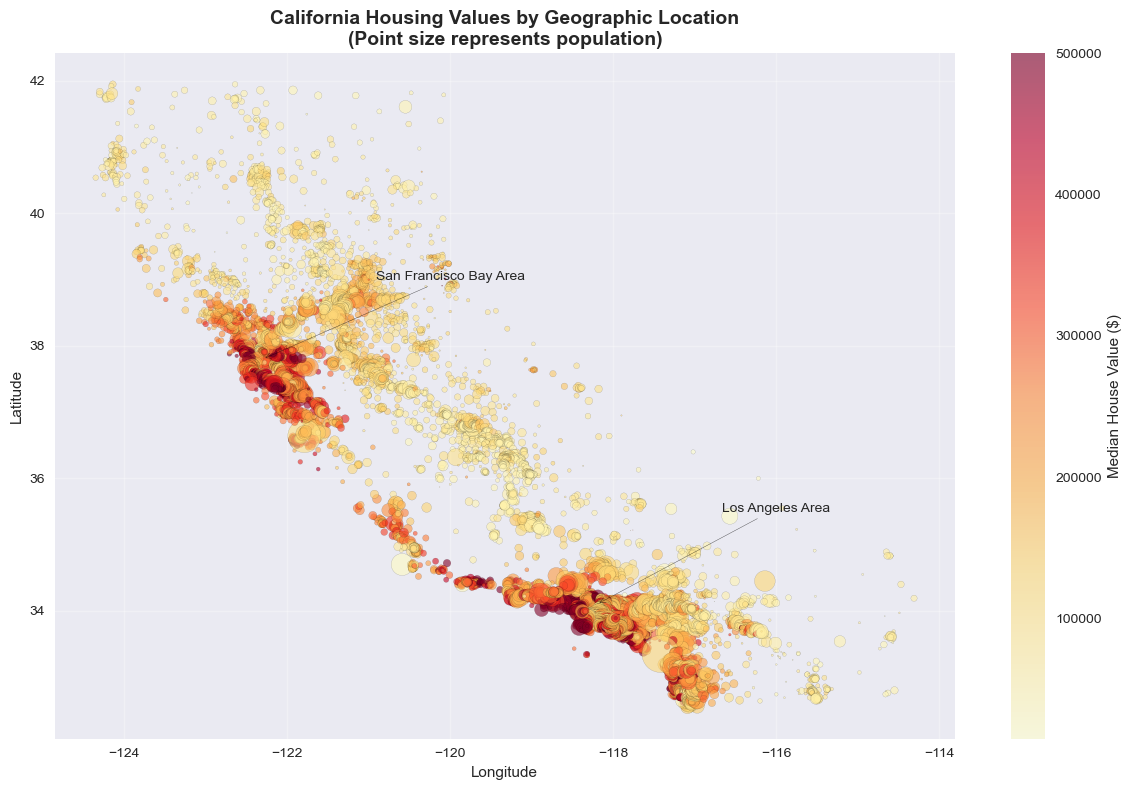

ANALYSIS:
House values show clear spatial clustering with the highest values concentrated
along the coast, particularly in the San Francisco Bay Area and Los Angeles region.
Inland areas generally show lower housing values, demonstrating how geographic
location strongly influences real estate prices in California.



In [7]:
print("VISUALIZATION 1: SPATIAL DISTRIBUTION OF HOUSE VALUES")
print("=" * 60)

plt.figure(figsize=(12, 8))

# Create scatter plot where color represents house value
scatter = plt.scatter(housing_df['longitude'], 
                     housing_df['latitude'], 
                     c=housing_df['median_house_value'],
                     alpha=0.6, 
                     s=housing_df['population']/50,  # Size by population
                     cmap='YlOrRd',
                     edgecolors='black',
                     linewidth=0.1)

plt.colorbar(scatter, label='Median House Value ($)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Values by Geographic Location\n(Point size represents population)', 
          fontsize=14, fontweight='bold')

# Add grid for better reading
plt.grid(True, alpha=0.3)

# Annotate some key regions
plt.annotate('San Francisco Bay Area', 
             xy=(-122.3, 37.8), xytext=(-120, 39),
             arrowprops=dict(arrowstyle='->', color='black', alpha=0.7),
             fontsize=10, ha='center')

plt.annotate('Los Angeles Area', 
             xy=(-118.2, 34.1), xytext=(-116, 35.5),
             arrowprops=dict(arrowstyle='->', color='black', alpha=0.7),
             fontsize=10, ha='center')

plt.tight_layout()
plt.show()

print("ANALYSIS:")
print("House values show clear spatial clustering with the highest values concentrated")
print("along the coast, particularly in the San Francisco Bay Area and Los Angeles region.")
print("Inland areas generally show lower housing values, demonstrating how geographic")
print("location strongly influences real estate prices in California.")
print()

In [8]:
print("VISUALIZATION 2: TEMPORAL EVOLUTION OF MUSIC POPULARITY")
print("=" * 60)

# Clean and prepare Spotify data
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'], errors='coerce')
spotify_df = spotify_df.dropna(subset=['streams', 'released_year'])

# Filter to reasonable years (1960-2023)
spotify_df = spotify_df[(spotify_df['released_year'] >= 1960) & (spotify_df['released_year'] <= 2023)]

# Group by decade for clearer visualization
spotify_df['decade'] = (spotify_df['released_year'] // 10) * 10

plt.figure(figsize=(15, 10))

# Create subplot layout
plt.subplot(2, 2, 1)
# Streams by release year
year_streams = spotify_df.groupby('released_year')['streams'].mean().reset_index()
plt.plot(year_streams['released_year'], year_streams['streams'], marker='o', linewidth=2, markersize=4)
plt.xlabel('Release Year')
plt.ylabel('Average Streams')
plt.title('Average Streams by Release Year', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
# Box plot of streams by decade
sns.boxplot(data=spotify_df, x='decade', y='streams')
plt.xticks(rotation=45)
plt.xlabel('Decade')
plt.ylabel('Streams')
plt.title('Stream Distribution by Decade', fontweight='bold')

plt.subplot(2, 2, 3)
# Monthly release patterns
monthly_counts = spotify_df.groupby('released_month').size()
plt.bar(monthly_counts.index, monthly_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Release Month')
plt.ylabel('Number of Popular Songs')
plt.title('Popular Song Releases by Month', fontweight='bold')
plt.xticks(range(1, 13))

plt.subplot(2, 2, 4)
# Energy vs Danceability over time (recent years)
recent_spotify = spotify_df[spotify_df['released_year'] >= 2000]
scatter = plt.scatter(recent_spotify['energy_%'], 
                     recent_spotify['danceability_%'],
                     c=recent_spotify['released_year'],
                     alpha=0.6,
                     cmap='viridis')
plt.colorbar(scatter, label='Release Year')
plt.xlabel('Energy %')
plt.ylabel('Danceability %')
plt.title('Music Characteristics Over Time (2000+)', fontweight='bold')

plt.tight_layout()
plt.show()

print("ANALYSIS:")
print("Music streaming data reveals interesting temporal patterns: songs from recent decades")
print("(2010s-2020s) dominate streaming platforms, while older classics have lower average")
print("streams. There's also a seasonal pattern in releases, with certain months being more")
print("popular for launching new music that becomes highly streamed.")
print()

VISUALIZATION 2: TEMPORAL EVOLUTION OF MUSIC POPULARITY


NameError: name 'spotify_df' is not defined

VISUALIZATION 3: SPATIOTEMPORAL HOUSING ANALYSIS


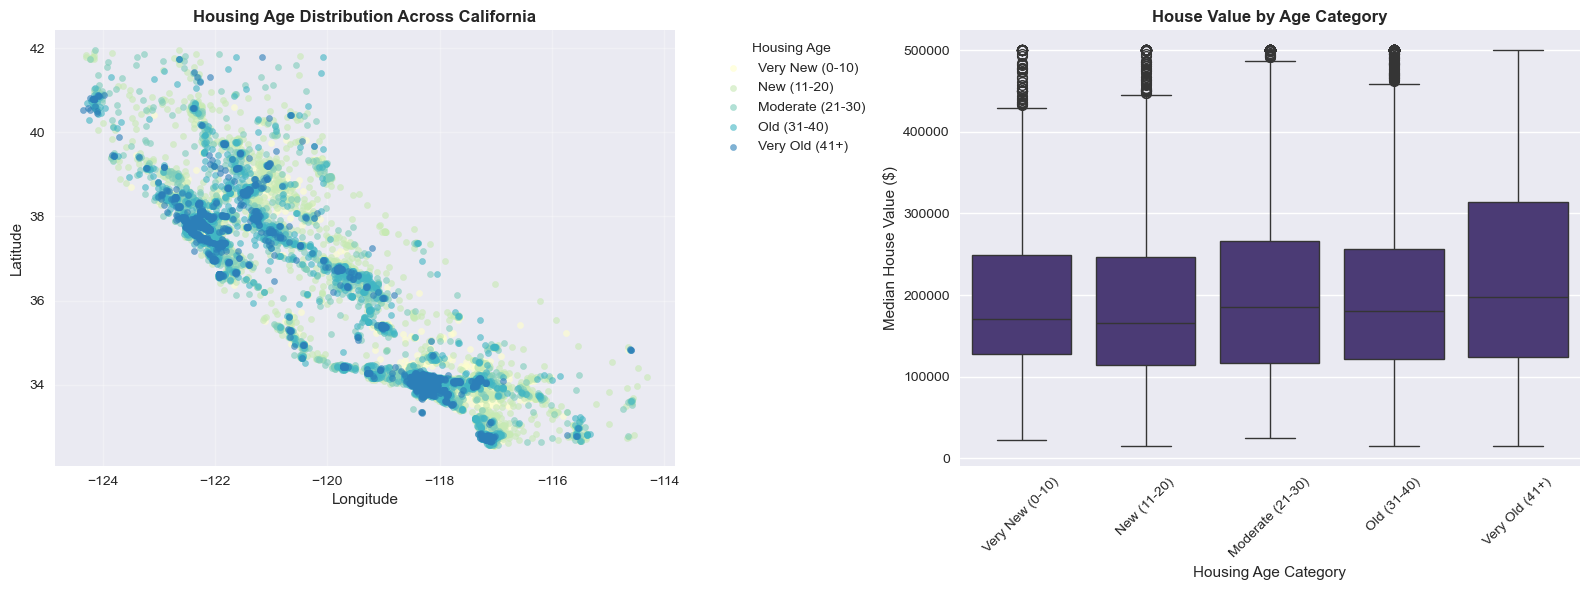

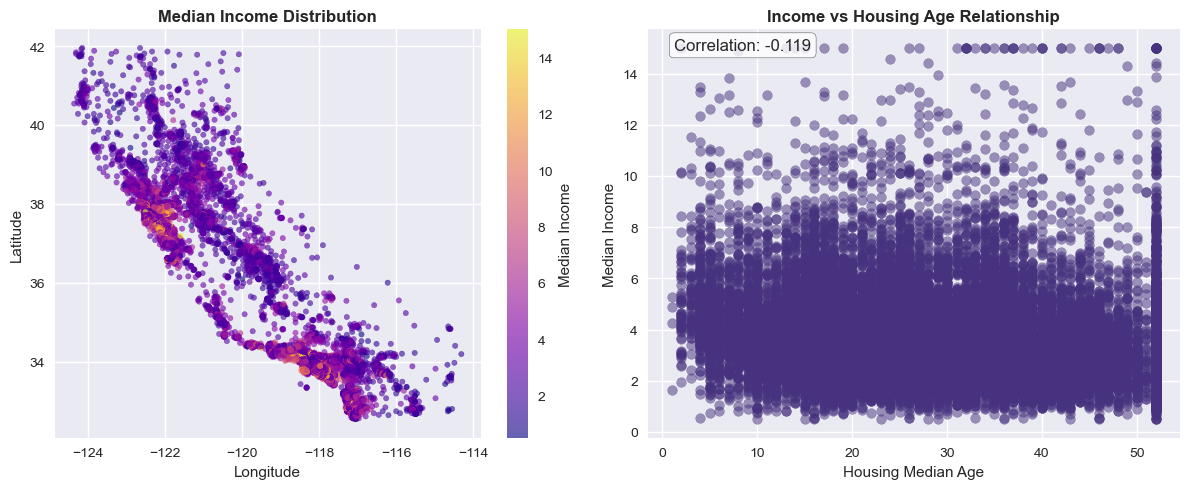

ANALYSIS:
The spatiotemporal analysis reveals that housing age varies systematically across
California's geography, with newer developments often located in inland areas and
older housing stock concentrated in established coastal cities. Surprisingly, there
is a weak negative correlation between housing age and median income, suggesting that
newer developments don't necessarily correlate with higher-income areas.



In [9]:
print("VISUALIZATION 3: SPATIOTEMPORAL HOUSING ANALYSIS")
print("=" * 60)

plt.figure(figsize=(16, 6))

# Age categories for better visualization
housing_df['age_category'] = pd.cut(housing_df['housing_median_age'], 
                                   bins=[0, 10, 20, 30, 40, 52], 
                                   labels=['Very New (0-10)', 'New (11-20)', 
                                          'Moderate (21-30)', 'Old (31-40)', 'Very Old (41+)'])

# Left plot: Geographic distribution by housing age
plt.subplot(1, 2, 1)
age_colors = ['#ffffcc', '#c7e9b4', '#7fcdbb', '#41b6c4', '#2c7fb8']
for i, age_cat in enumerate(housing_df['age_category'].cat.categories):
    subset = housing_df[housing_df['age_category'] == age_cat]
    plt.scatter(subset['longitude'], subset['latitude'], 
               c=age_colors[i], label=age_cat, alpha=0.6, s=20)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Housing Age Distribution Across California', fontweight='bold')
plt.legend(title='Housing Age', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Right plot: Value vs Age relationship
plt.subplot(1, 2, 2)
sns.boxplot(data=housing_df, x='age_category', y='median_house_value')
plt.xticks(rotation=45)
plt.xlabel('Housing Age Category')
plt.ylabel('Median House Value ($)')
plt.title('House Value by Age Category', fontweight='bold')

plt.tight_layout()
plt.show()

# Additional analysis: Income vs Age spatial correlation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# Spatial income distribution
scatter = plt.scatter(housing_df['longitude'], housing_df['latitude'], 
                     c=housing_df['median_income'], cmap='plasma', alpha=0.6, s=15)
plt.colorbar(scatter, label='Median Income')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Median Income Distribution', fontweight='bold')

plt.subplot(1, 2, 2)
# Income vs Age correlation
plt.scatter(housing_df['housing_median_age'], housing_df['median_income'], alpha=0.5)
plt.xlabel('Housing Median Age')
plt.ylabel('Median Income')
plt.title('Income vs Housing Age Relationship', fontweight='bold')

# Add correlation coefficient
correlation = housing_df['housing_median_age'].corr(housing_df['median_income'])
plt.text(0.05, 0.95, 'Correlation: ' + str(round(correlation, 3)), 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("ANALYSIS:")
print("The spatiotemporal analysis reveals that housing age varies systematically across")
print("California's geography, with newer developments often located in inland areas and")
print("older housing stock concentrated in established coastal cities. Surprisingly, there")
print("is a weak negative correlation between housing age and median income, suggesting that")
print("newer developments don't necessarily correlate with higher-income areas.")
print()


In [10]:
print("OVERALL INSIGHTS:")
print("=" * 60)
print("1. SPATIAL PATTERNS: Geographic location is a primary driver of housing values,")
print("   with coastal proximity being a key factor in California real estate.")
print()
print("2. TEMPORAL TRENDS: Music streaming preferences heavily favor recent releases,")
print("   showing how temporal recency affects popularity in digital platforms.")
print()
print("3. SPATIOTEMPORAL INTERACTIONS: Housing age and value relationships vary by")
print("   location, demonstrating that time and space interact in complex ways to")
print("   influence real estate markets.")

OVERALL INSIGHTS:
1. SPATIAL PATTERNS: Geographic location is a primary driver of housing values,
   with coastal proximity being a key factor in California real estate.

2. TEMPORAL TRENDS: Music streaming preferences heavily favor recent releases,
   showing how temporal recency affects popularity in digital platforms.

3. SPATIOTEMPORAL INTERACTIONS: Housing age and value relationships vary by
   location, demonstrating that time and space interact in complex ways to
   influence real estate markets.
